# III. EDA

In [1]:
#Import library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [2]:
#Import data
vehicle_data = pd.read_csv('../data/vehicle_data_cleaned.csv')

In [3]:
vehicle_data.head(1).T

,0
region,auburn
price,35990
manufacturer,chevrolet
model,corvette grand sport
condition,good
cylinders,8 cylinders
fuel,gas
odometer,32742
title_status,clean
transmission,other


In [4]:
vehicle_data.dtypes

region           object
price             int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
state            object
lat             float64
long            float64
age             float64
dtype: object

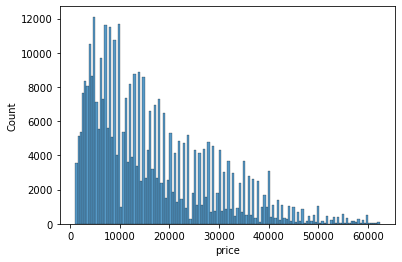

In [5]:
sns.histplot(vehicle_data['price']);

So we can easily see the trend here. The more expensive, the less listing we have.

In [6]:
def price_sampler(n):
    return np.random.choice(vehicle_data['price'], n)

In [7]:
sampler = pd.DataFrame([np.mean(price_sampler(10000)) for i in range(10000)])
np.percentile(sampler, [2.5, 97.5])

array([15880.94285, 16342.461  ])

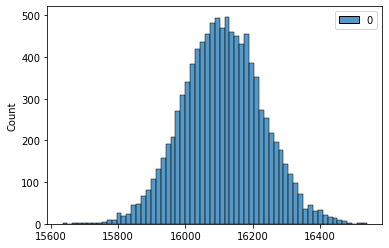

In [8]:
sns.histplot(sampler);

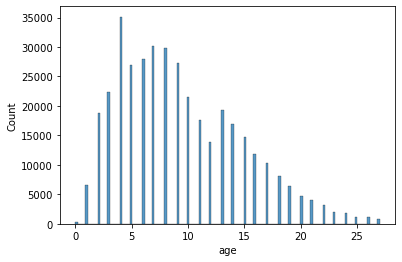

In [9]:
sns.histplot(vehicle_data['age']);

Cars about 4 years old are on sale the most. The older the car, the less likely it will be listed on Craiglist.

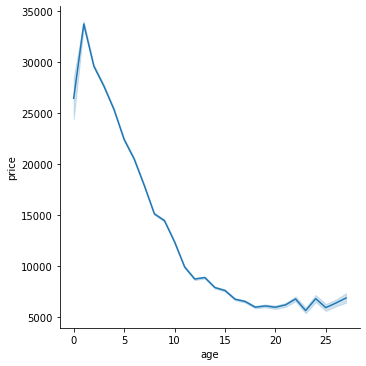

In [10]:
sns.relplot(x='age', y='price', data=vehicle_data, kind='line');

Easy to see (and understand) that older car will cost less (for regular car).

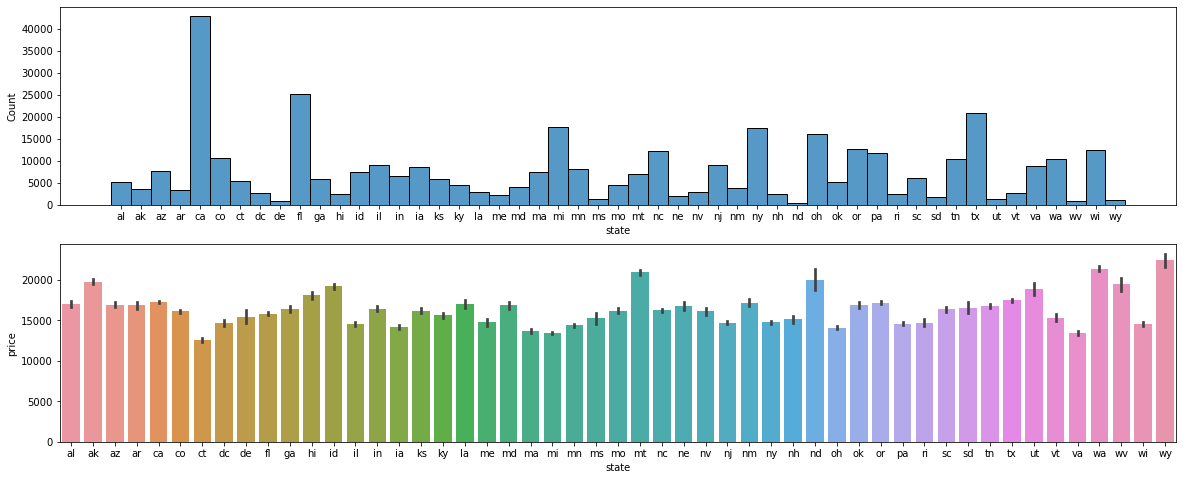

In [11]:
f, axs = plt.subplots(2, 1, figsize=(20, 8))
sns.histplot(vehicle_data['state'], ax=axs[0])
sns.barplot(x='state', y='price', data=vehicle_data, ax=axs[1]);

- California has highest number of listing, far above the following such as Florida, Texas, New York. Can we explain this as because California is a capitol of high tech, which they tend to make use of online tool such as Craiglist? 
- Average price for a used car in every state is over \$10,000, many of them are over \$15,000. Wyoming, Washington, Montana, and North Dakota leads the average price with about \$20,000 but have a lot less listing.

In [12]:
#Function to group data
def group_data(column):
    name = vehicle_data.groupby([column]).agg(
        avg_price = pd.NamedAgg(column='price', aggfunc='mean'),
        listing_count = pd.NamedAgg(column=column, aggfunc='count')
    )
    name.avg_price = name.avg_price.round()
    name = name.sort_values('avg_price')
    return name.reset_index()

#Function to set x, y
def get_xy(data, column):
    y1 = data.avg_price
    y2 = data.listing_count
    x = data[column]
    return x, y1, y2

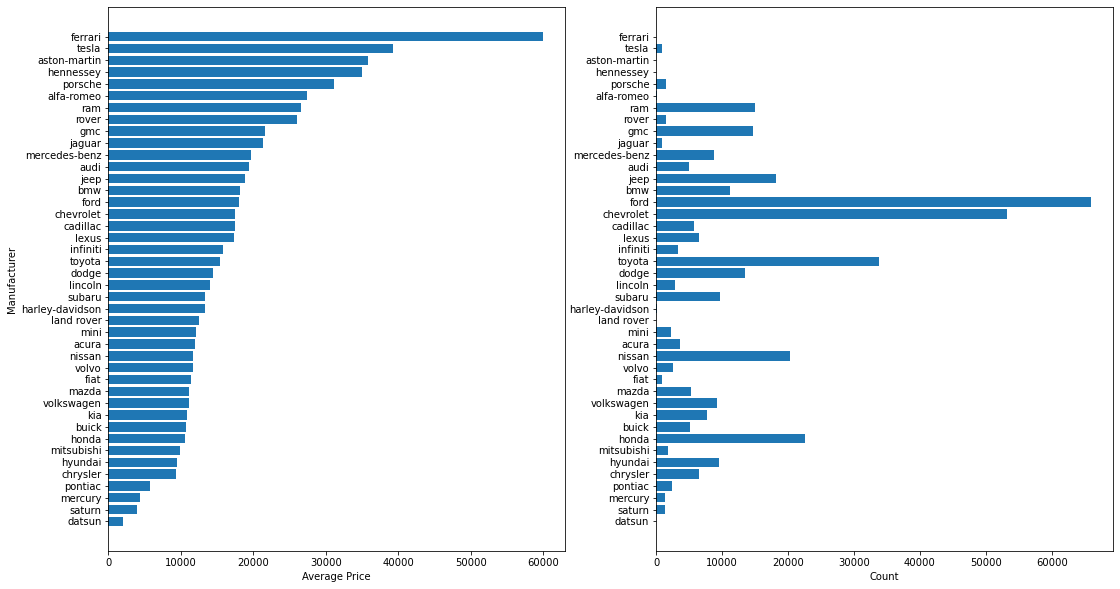

In [13]:
vehicle_by_manufacturer = group_data('manufacturer')
x, y1, y2 = get_xy(vehicle_by_manufacturer, 'manufacturer')
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
axs[0].barh(x, y1)
axs[0].set_xlabel('Average Price')
axs[0].set_ylabel('Manufacturer')
axs[1].barh(x, y2)
axs[1].set_xlabel('Count')
plt.tight_layout;

- Ford is the most popular car on Craiglist, follow by Chevrolet, surprisingly. Toyota and Honda are only the third and forth.
- Ferrari has highest average price (well, it's a freaking super car). Tesla, Porsche, Aston-martin are the next ones (and yes they are luxury car). One interesting name here is Hennessey, which is a company that modifies car, not really a car manufacturer. You can find more about them here http://hennesseyperformance.com/about/

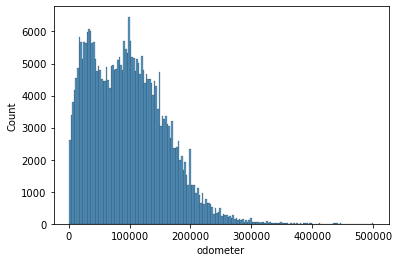

In [14]:
sns.histplot(vehicle_data['odometer']);

In [15]:
vehicle_data[['price', 'odometer', 'age']].corr()

,price,odometer,age
price,1.000000,-0.557389,-0.605126
odometer,-0.557389,1.000000,0.651682
age,-0.605126,0.651682,1.000000


From the correlation, we can see that price has negative correlation with odometer and age, which is expected.

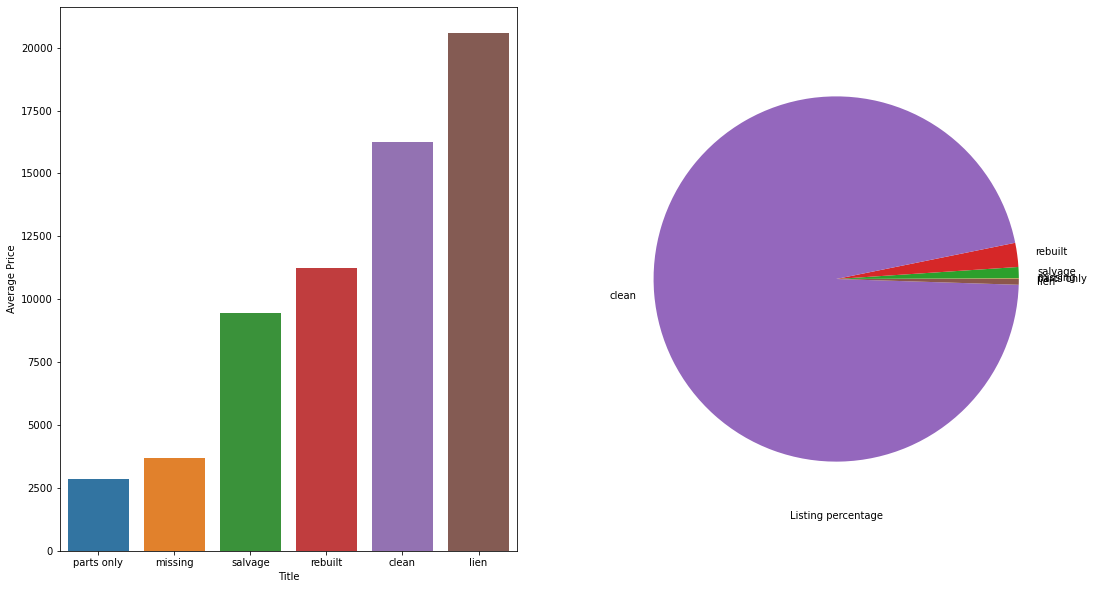

In [16]:
#Group by title
vehicle_by_title = group_data('title_status')
#Draw
x, y1, y2 = get_xy(vehicle_by_title, 'title_status')
fig, axs = plt.subplots(1, 2, figsize=(18,10))
sns.barplot(x='title_status', y='avg_price', data=vehicle_by_title, ax=axs[0])
axs[0].set_xlabel('Title')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

Lean title (finance, lease, etc.) has the highest average price while only have very small percentage on the listing. Clean title is listed the most. Parts only vehicle has the least value, of course. Surprisingly, Salvage title vehicles' average price is almost \$10000. 

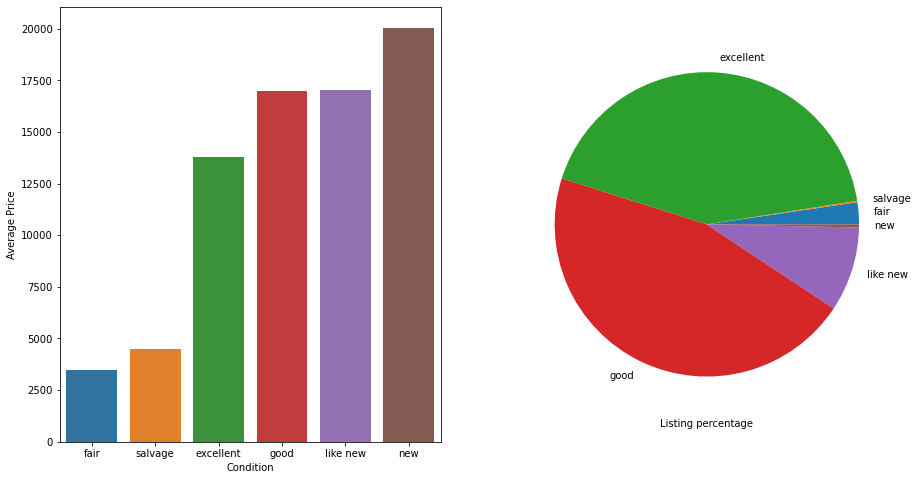

In [17]:
#Group by condition
vehicle_by_condition = group_data('condition')
#Draw
x, y1, y2 = get_xy(vehicle_by_condition, 'condition')
fig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(x='condition', y='avg_price', data=vehicle_by_condition, ax=axs[0])
axs[0].set_xlabel('Condition')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

It's easy to understand that new car will cost more. Interesting thing here is excellent car is priced less than good and like new car, and salvage car cost more than fair condition!

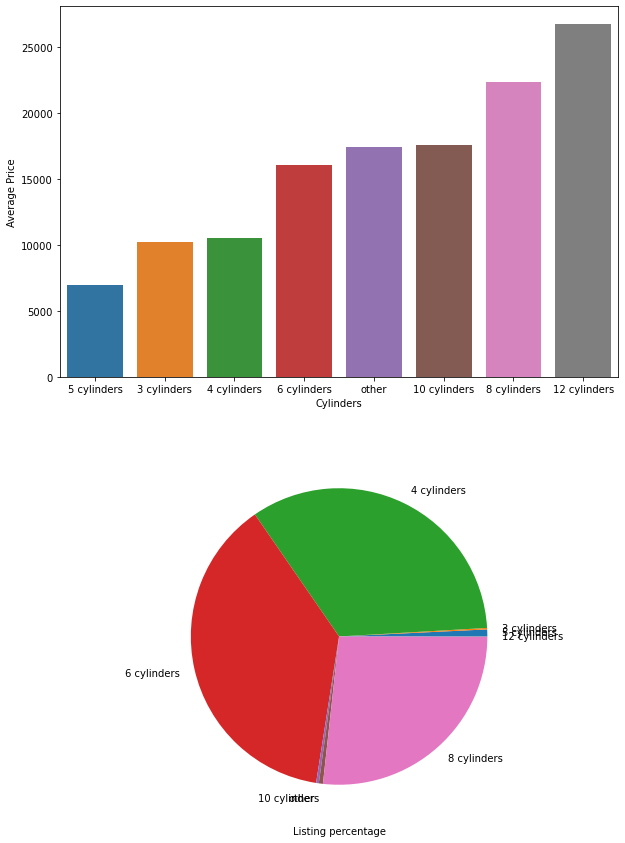

In [18]:
#Group by cylinders
vehicle_by_cylinders = group_data('cylinders')
#Draw
x, y1, y2 = get_xy(vehicle_by_cylinders, 'cylinders')
fig, axs = plt.subplots(2, 1, figsize=(10,15))
sns.barplot(x='cylinders', y='avg_price', data=vehicle_by_cylinders, ax=axs[0])
axs[0].set_xlabel('Cylinders')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

I'm not too familiar with the car's cylinders, but I believe in general, the more cylinders, the faster the car, and of course the more gas it uses. 4, 6, and 8 cylinders are listed the most, while 12 cylinders car has highest price.

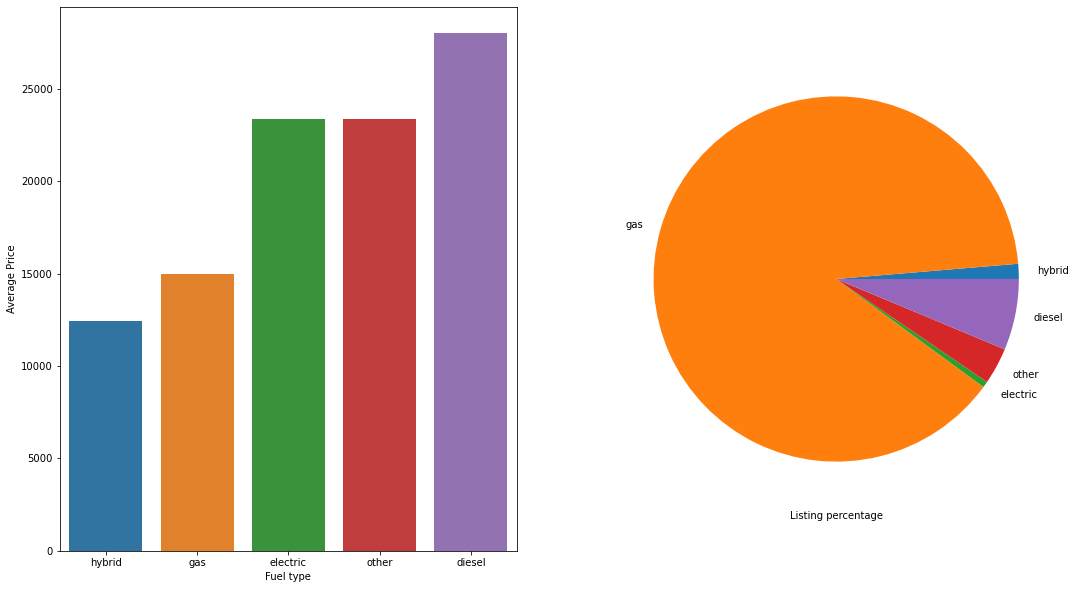

In [19]:
#Group by fuel
vehicle_by_fuel = group_data('fuel')
#Draw
x, y1, y2 = get_xy(vehicle_by_fuel, 'fuel')
fig, axs = plt.subplots(1, 2, figsize=(18,10))
sns.barplot(x='fuel', y='avg_price', data=vehicle_by_fuel, ax=axs[0])
axs[0].set_xlabel('Fuel type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

Gas vehicle dominates the listing as expected. Somehow diesel car has highest average listing price while hybrid car is lowest. One explaination is that cars that use diesel are usually big like van or truck, so the average price is higher. Hybrid car, on the other hand, lose value because of the battery that will need to be changed after about 10 years.

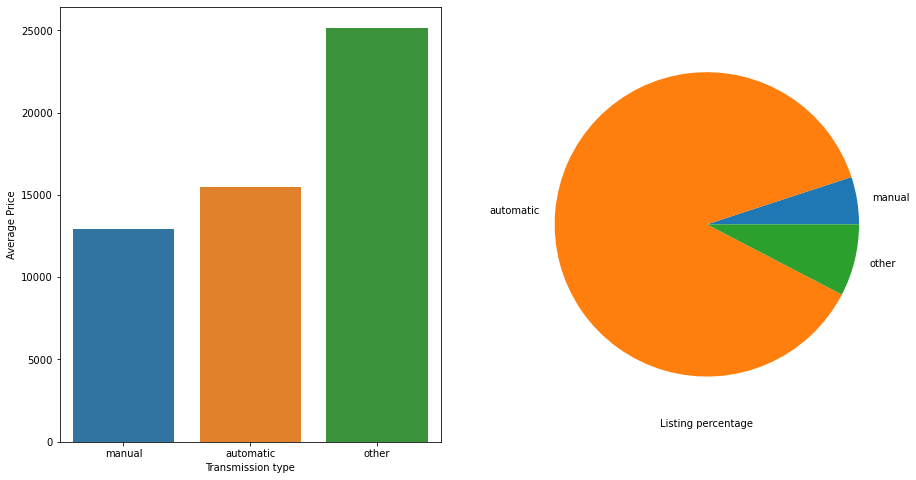

In [20]:
#Group by transmission
vehicle_by_transmission = group_data('transmission')
#Draw
x, y1, y2 = get_xy(vehicle_by_transmission, 'transmission')
fig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(x='transmission', y='avg_price', data=vehicle_by_transmission, ax=axs[0])
axs[0].set_xlabel('Transmission type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

Automatic cars are listed the most, not surprising, but I thought manual car usually cost more than automatic? Other type of transmission are CVT and Semi-automatic.

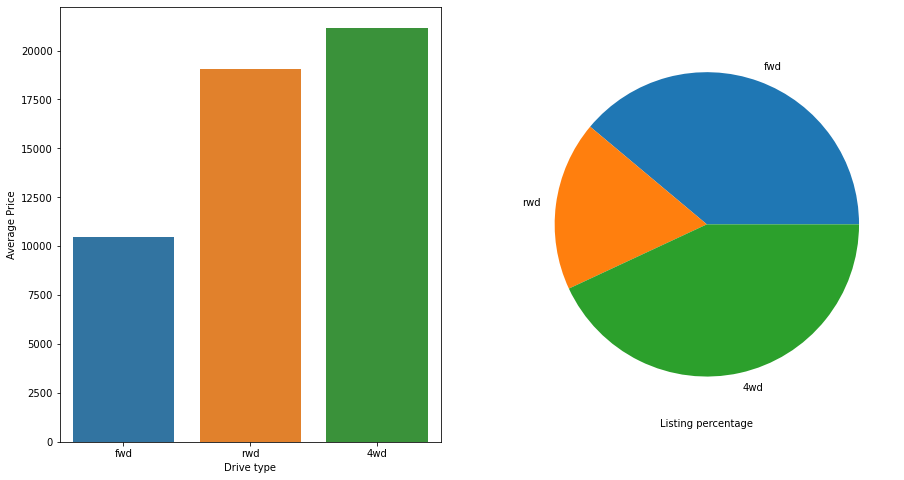

In [21]:
#Group by drive
vehicle_by_drive = group_data('drive')
#Draw
x, y1, y2 = get_xy(vehicle_by_drive, 'drive')
fig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(x='drive', y='avg_price', data=vehicle_by_drive, ax=axs[0])
axs[0].set_xlabel('Drive type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

No surprise here. 4WD and RWD cars are usually more expensive than FWD.

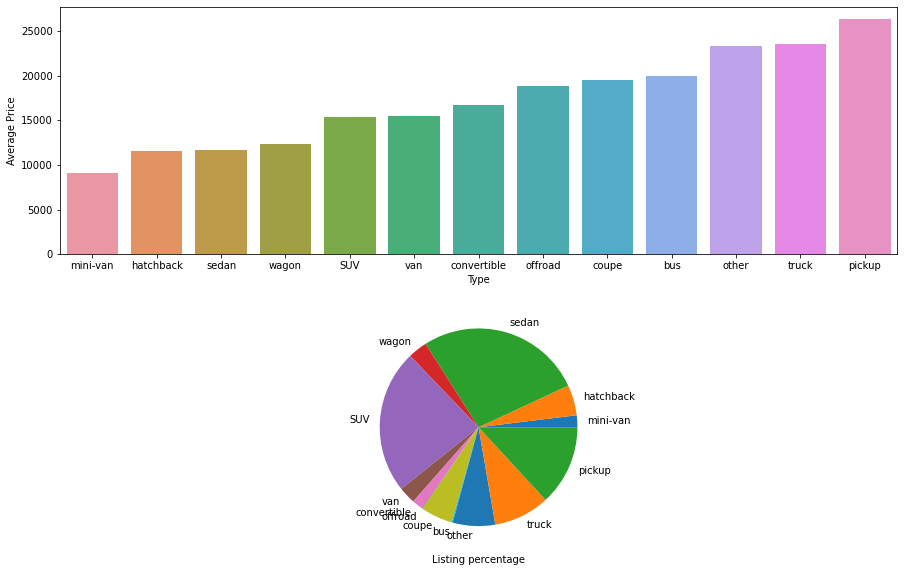

In [22]:
#Group by type
vehicle_by_type = group_data('type')
#Draw
x, y1, y2 = get_xy(vehicle_by_type, 'type')
fig, axs = plt.subplots(2, 1, figsize=(15,10))
sns.barplot(x='type', y='avg_price', data=vehicle_by_type, ax=axs[0])
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

Sedan and SUV are listed the most. Somehow mini-van has lowest average price.

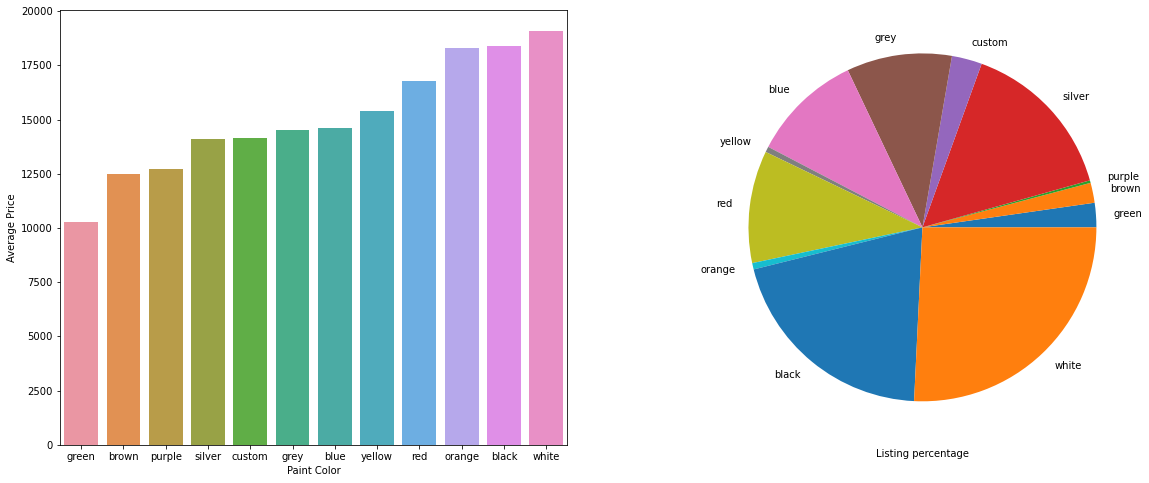

In [23]:
#Group by paint color
vehicle_by_paint = group_data('paint_color')
#Draw
x, y1, y2 = get_xy(vehicle_by_paint, 'paint_color')
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(x='paint_color', y='avg_price', data=vehicle_by_paint, ax=axs[0])
axs[0].set_xlabel('Paint Color')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

White cars are the most popular and cost the most, following by black and orange.

Now let's take a look at the Price column again

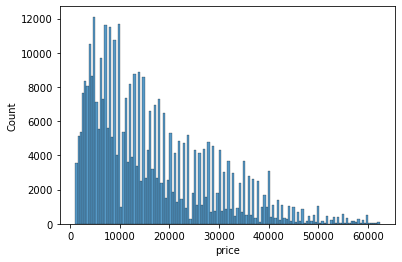

In [24]:
sns.histplot(data=vehicle_data['price']);

Not a normal distribution. Let's try log10 this column to get the normal distribution.

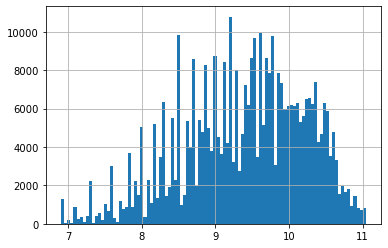

In [25]:
vehicle_data['log_price'] = np.log(vehicle_data['price'].values)
vehicle_data['log_price'].hist(bins=100);

C:\Users\hyuwo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


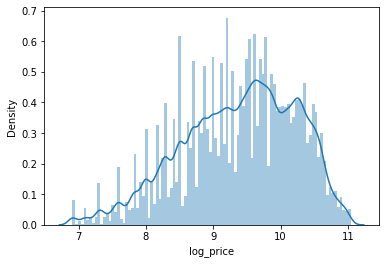

In [26]:
sns.distplot(vehicle_data['log_price'], bins=100);

Just a little better, but that's fine for now.

One thing we notice that there's a lot of missing data in our columns. Instead of drop all of them, let's just fill them with some data.

In [27]:
missing = pd.concat([vehicle_data.isnull().sum(), 100 * vehicle_data.isnull().mean()], axis=1)
missing.columns = (['count', '%'])
missing.sort_values('%')

,count,%
region,0,0.000000
state,0,0.000000
log_price,0,0.000000
price,0,0.000000
age,831,0.215446
transmission,1696,0.439707
title_status,1772,0.459411
fuel,2356,0.610820
lat,2645,0.685747
long,2645,0.685747


In [28]:
def fill_data(column):
    vehicle_data[column][vehicle_data[column].isnull()] = 'other'
for column in ['transmission', 'title_status', 'fuel', 'model', 'manufacturer', 'type', 'drive', 'paint_color', 'cylinders', 'condition']:
    fill_data(column)

<ipython-input-28-8308619e6400>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data[column][vehicle_data[column].isnull()] = 'other'


In [29]:
missing = pd.concat([vehicle_data.isnull().sum(), 100 * vehicle_data.isnull().mean()], axis=1)
missing.columns = (['count', '%'])
missing.sort_values('%')

,count,%
region,0,0.000000
state,0,0.000000
paint_color,0,0.000000
type,0,0.000000
drive,0,0.000000
transmission,0,0.000000
title_status,0,0.000000
cylinders,0,0.000000
condition,0,0.000000
model,0,0.000000


Good. Now we have 2 columns to fill the missing data: age and odometer. We will not use lat/long for our model so just ignore them.

In [30]:
age_mean = np.round(np.mean(vehicle_data['age']))
odo_mean = np.round(np.mean(vehicle_data['odometer']))

vehicle_data['age'].fillna(value=age_mean, inplace=True)
vehicle_data['odometer'].fillna(value=odo_mean, inplace=True)

In [31]:
missing = pd.concat([vehicle_data.isnull().sum(), 100 * vehicle_data.isnull().mean()], axis=1)
missing.columns = (['count', '%'])
missing.sort_values('%')

,count,%
region,0,0.000000
state,0,0.000000
paint_color,0,0.000000
type,0,0.000000
drive,0,0.000000
transmission,0,0.000000
age,0,0.000000
title_status,0,0.000000
fuel,0,0.000000
cylinders,0,0.000000


In [32]:
vehicle_data.describe()

,price,odometer,lat,long,age,log_price
count,385711.000000,385711.000000,383066.000000,383066.000000,385711.000000,385711.000000
mean,16110.885430,97111.125739,38.571047,-93.941969,9.321373,9.378939
std,11982.341428,58206.945689,5.867498,17.767168,5.407248,0.841793
min,1000.000000,500.000000,-82.607549,-164.091797,0.000000,6.907755
25%,6550.000000,50979.000000,34.760000,-106.591402,5.000000,8.787220
50%,12990.000000,97111.000000,39.355403,-87.972860,8.000000,9.471935
75%,22990.000000,131885.500000,42.477134,-81.016966,13.000000,10.042815
max,62414.000000,500000.000000,82.049255,94.163200,27.000000,11.041545


Great! Now we are ready to build our models.

In [33]:
datapath = '../data'
save_file(vehicle_data, 'vehicle_data_final.csv', datapath)

A file already exists with this name.



Do you want to overwrite? (Y/N) y


Writing file.  "../data\vehicle_data_final.csv"
